In [97]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'Helvetica', 'text.usetex': False})
%matplotlib inline

from utils.models import MLP
from utils.trainer import train_MLP
from utils.data import create_xor_dataset
from utils.plotting import plot_var

import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


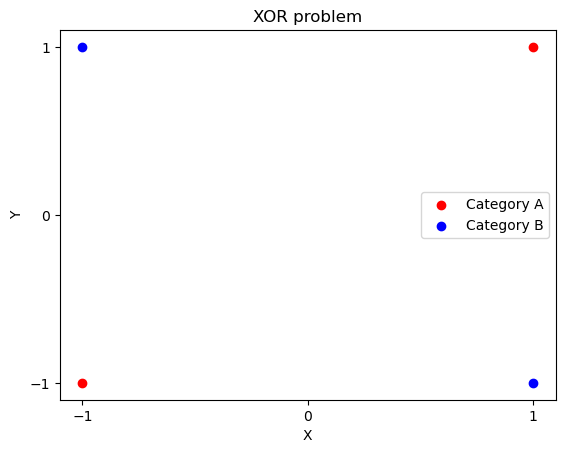

In [5]:
x1 = np.array ([-1., -1., 1., 1.], dtype = np.float32)
x2 = np.array ([-1., 1., -1., 1.], dtype = np.float32)
y  = np.array ([-1., 1., 1., -1.],dtype = np.float32)

plt.scatter(x1[y == -1.], x2[y == -1.], c = 'r', label = 'Category A')
plt.scatter(x1[y == 1.], x2[y == 1.], c = 'b', label = 'Category B')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend()
plt.title('XOR problem')

X = torch.tensor([x1, x2]).T
y = torch.tensor(y).unsqueeze(1)

# plt.savefig("x-or problem.svg")

In [6]:
n_runs = 20
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
w1_inits = [0.0025, 0.25]
# w1_inits = [0.001,0.01,0.1,0.5]
w2_init = 1/dim_hidden

models = []
losses = np.zeros((len(w1_inits), n_runs, n_epochs))
w1_rel_changes = np.zeros((len(w1_inits), n_runs, n_epochs))
w2_rel_changes = np.zeros((len(w1_inits), n_runs, n_epochs))

# Training
for w_i, w1_init in enumerate(w1_inits):
    for r_i in range(n_runs):
        # Model instantiation
        dlnn_model = MLP(dim_input, dim_hidden, dim_output, w1_init, w2_init)
    
        loss_per_run, weight_rel_changes_per_run = train_MLP(dlnn_model, X, y, n_epochs=n_epochs, lr=lr)
        losses[w_i, r_i, :] = loss_per_run
        w1_rel_changes[w_i, r_i, :] = weight_rel_changes_per_run[0]
        w2_rel_changes[w_i, r_i, :] = weight_rel_changes_per_run[1]

    models.append(dlnn_model)

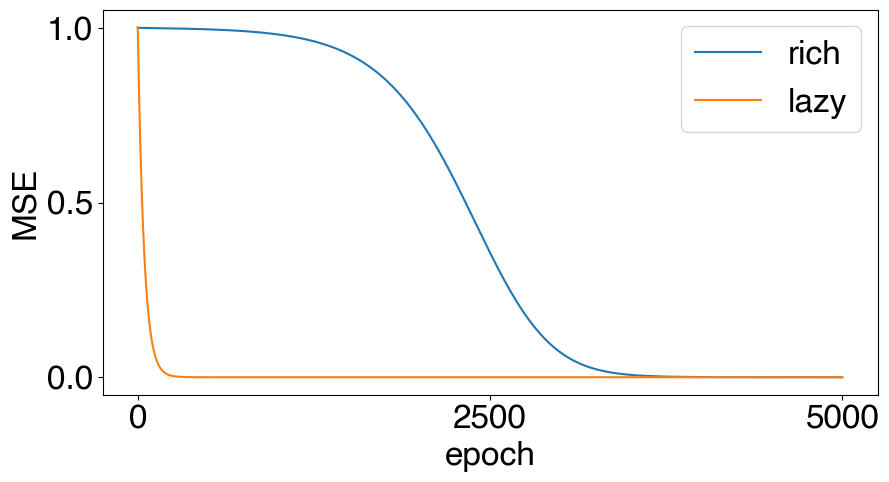

In [106]:
fig = plot_var(losses, y_ticks=[0, 0.5, 1])
# fig.savefig("rich_lazy_training_loss.svg")

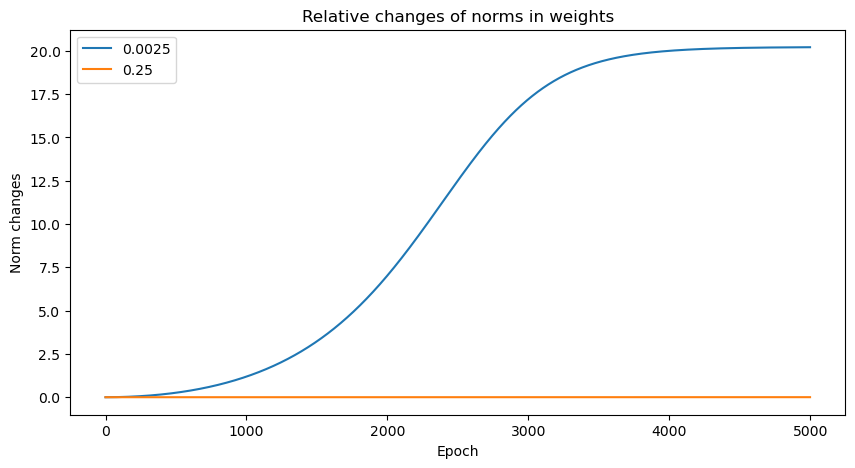

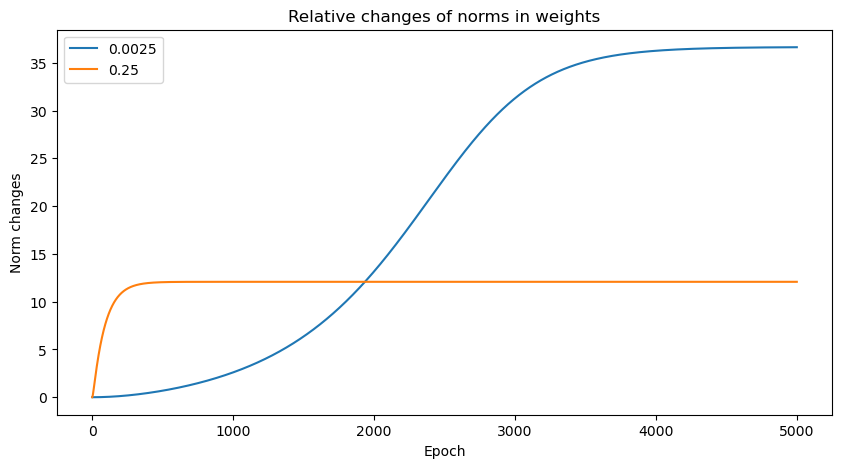

In [9]:
# Plotting relative changes of norms in wieghts
plot_var(w1_rel_changes, w1_inits, y_label="Norm changes", title="Relative changes of norms in weights")
plot_var(w2_rel_changes, w1_inits, y_label="Norm changes", title="Relative changes of norms in weights")

In [31]:
rich_lazy_init_models = [MLP(dim_input, dim_hidden, dim_output, w1_init, w2_init) for w1_init in w1_inits]
rich_lazy_trained_models = [models[0], models[-1]]

model_titles = ['before training', 'after training']

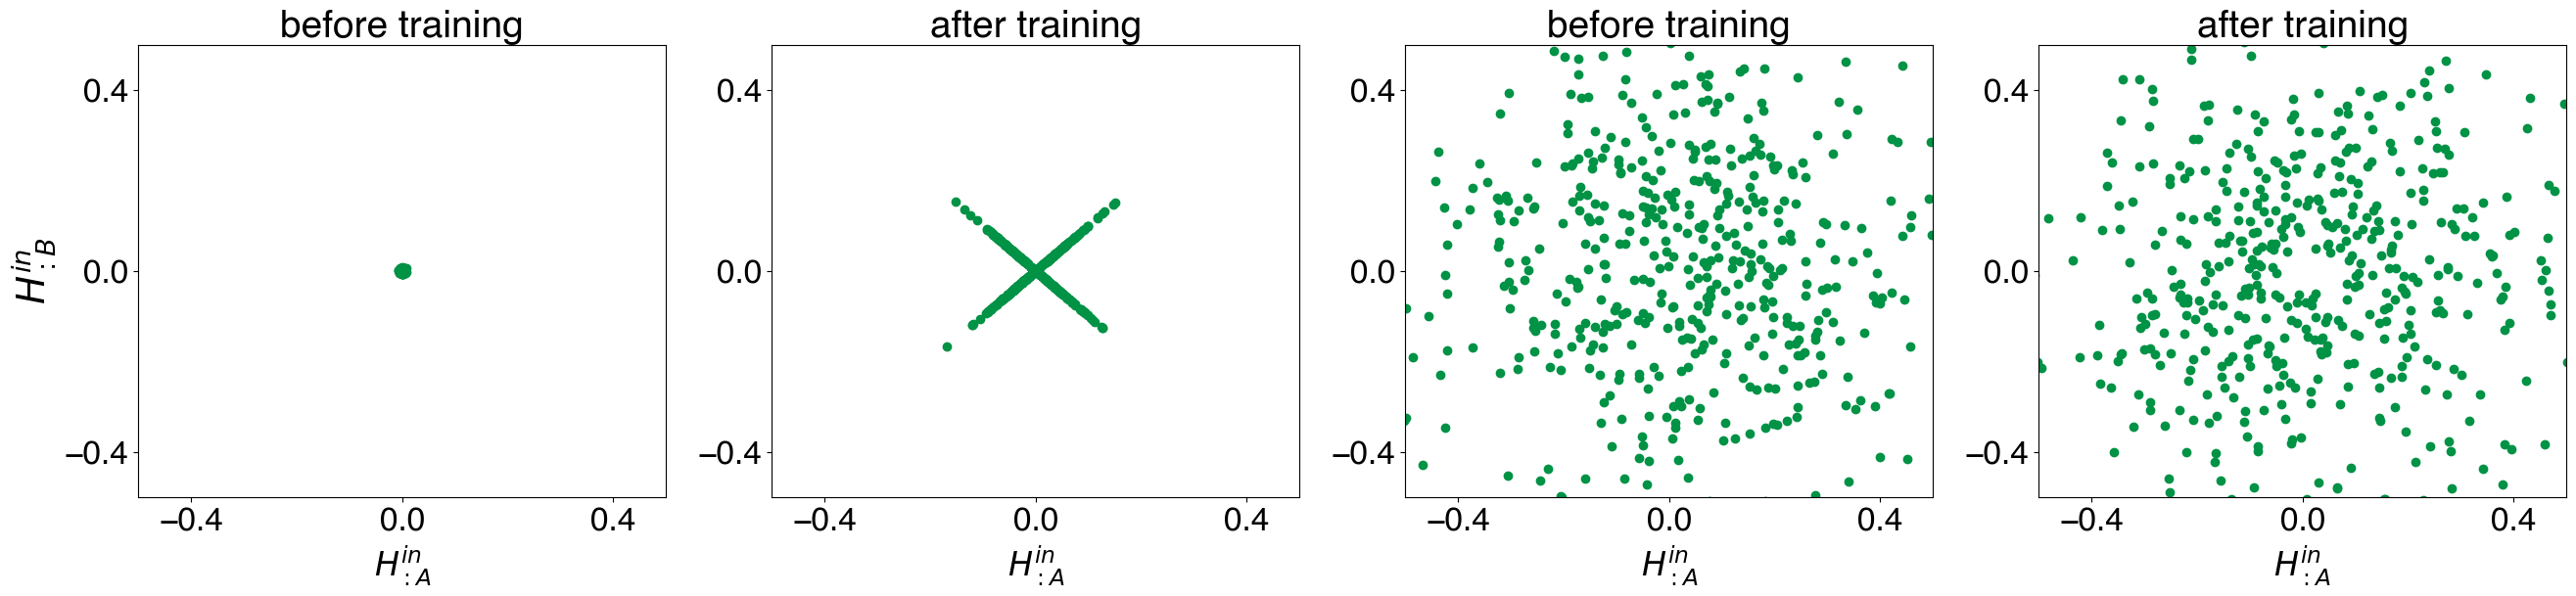

In [102]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(32, 6)

for w_i, weight in enumerate(w1_inits):
    init_model = rich_lazy_init_models[w_i]
    trained_model = rich_lazy_trained_models[w_i]
    
    for m_i, model in enumerate([init_model, trained_model]):
        fig_i = w_i*2 + m_i
        axis = axes[fig_i]
        
        for p_i, (name, param) in enumerate(model.named_parameters()):
            if name == 'in_hid.weight':
                in_hid = param.detach().numpy()
                axis.scatter(in_hid[:, 0], in_hid[:, 1], color=(0/255, 146/255, 69/255))

                axis.set_xlabel(r"$H^{in}_{:A}$", fontsize=24)
                if fig_i == 0:
                    axis.set_ylabel(r"$H^{in}_{:B}$", fontsize=28)
                axis.set_xlim(-0.5, 0.5)
                axis.set_ylim(-0.5, 0.5)
                axis.set_xticks([-0.4, 0, 0.4])
                axis.set_yticks([-0.4, 0, 0.4])

                axis.set_title(f'{model_titles[m_i]}', fontsize=28)

# plt.savefig("rich_lazy_learning_hidden_in.svg")

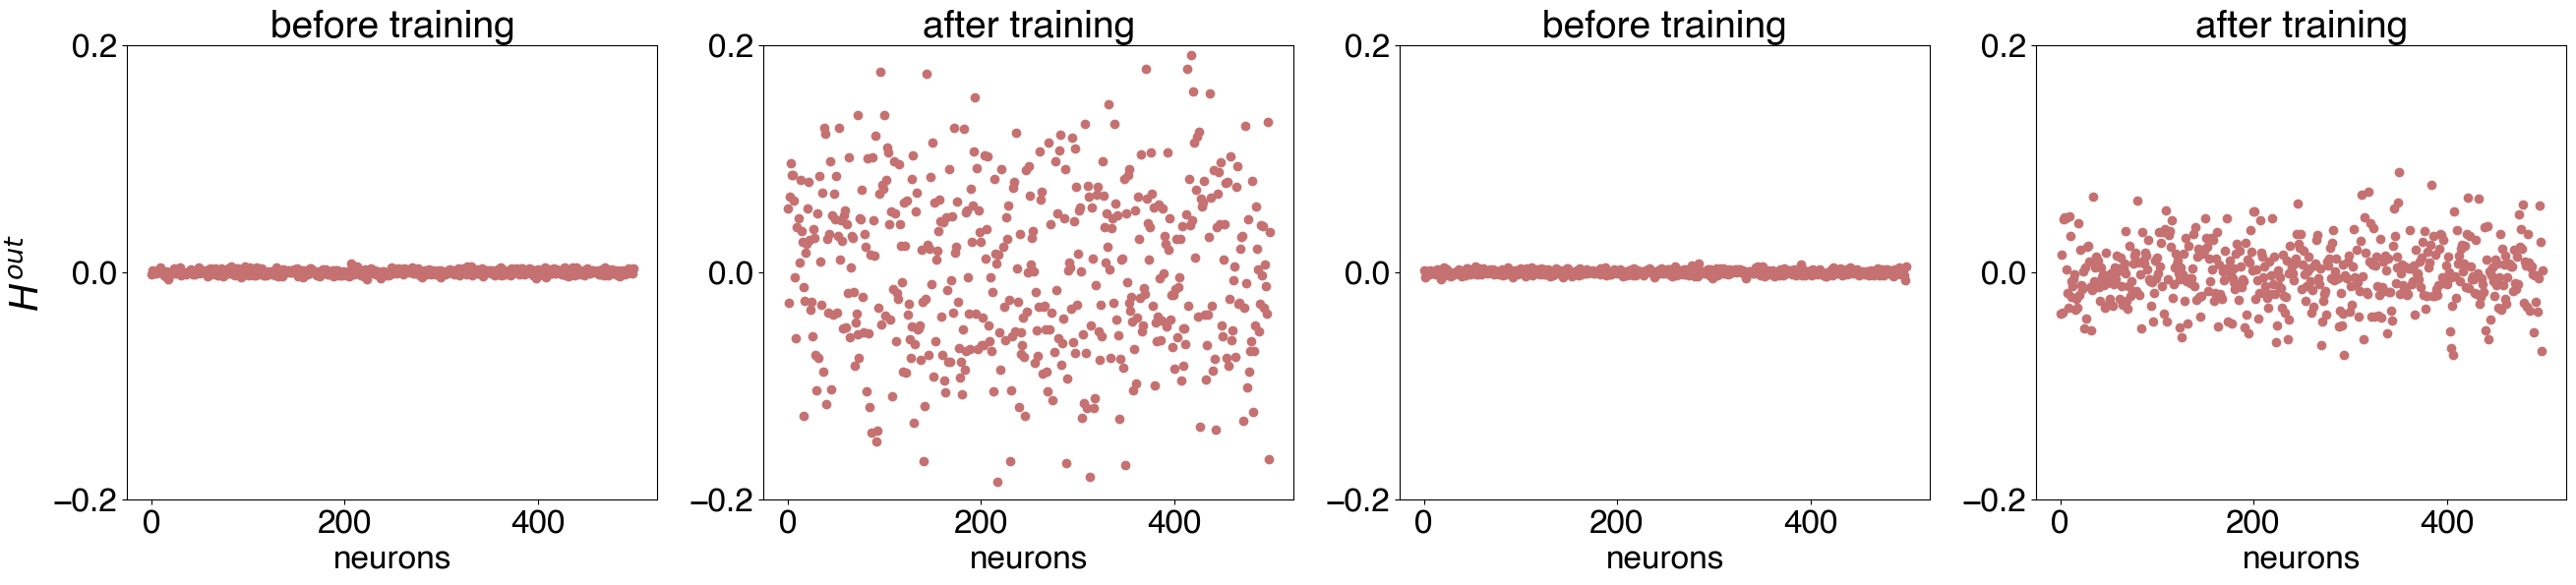

In [103]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(32, 6)

for w_i, weight in enumerate(w1_inits):
    init_model = rich_lazy_init_models[w_i]
    trained_model = rich_lazy_trained_models[w_i]
    
    for m_i, model in enumerate([init_model, trained_model]):
        fig_i = w_i*2 + m_i
        axis = axes[fig_i]
        
        for p_i, (name, param) in enumerate(model.named_parameters()):
            if name == 'hid_out.weight':
                hid_out = param.detach().numpy()
                
                axis.scatter(np.arange(hid_out.shape[1]), hid_out[0], color=(198/255, 113/255, 113/255))

                axis.set_xlabel('neurons', fontsize=24)
                if fig_i == 0:
                    axis.set_ylabel(r"$H^{out}$", fontsize=28)
                axis.set_ylim(-0.2, 0.2)
                axis.set_yticks([-0.2, 0, 0.2])

                axis.set_title(f'{model_titles[m_i]}', fontsize=28)

# plt.savefig("rich_lazy_learning_hidden_out.svg")

In [91]:
import glob, os
for f in glob.glob("task_rep_*.png"):
    os.remove(f)

In [ ]:
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
# w1_inits = [0.001,0.01,0.1,0.5]
w1_init = 0.5
w2_init = 1/dim_hidden

# Training
dlnn_model = LNNet(dim_input, dim_hidden, dim_output, w1_init, w2_init)

optimizer = optim.SGD(dlnn_model.parameters(), lr=lr)
criterion = nn.MSELoss()

vis_num_hidden = 10
sub_sample_idx = np.random.choice(dim_hidden, size=vis_num_hidden, replace=False)
vis_hidden_color = np.linspace(0, 1, vis_num_hidden)

for i in range(n_epochs):
    optimizer.zero_grad()
    y_pred, hiddens = dlnn_model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if i % 200 == 0:
        fig, axes = plt.subplots(1, 2)
        fig.set_size_inches(14, 5)
        for p_i, (name, param) in enumerate(dlnn_model.named_parameters()):
            axis = axes[p_i]
            
            if name == 'in_hid.weight':
                in_hid = param.detach().numpy()
                # axis.scatter(in_hid[:, 0], in_hid[:, 1])
                axis.scatter(in_hid[sub_sample_idx, 0], in_hid[sub_sample_idx, 1], c=vis_hidden_color)
                # axis.set_xticks([])
                # axis.set_yticks([])

                axis.set_xlabel('W_in X')
                axis.set_ylabel('W_in Y')
                # axis.set_xlim(-2, 2)
                # axis.set_ylim(-2, 2)
                
                axis.set_title(f'{name}, lazy')
                
            elif name == 'hid_out.weight':
                hid_out = param.detach().numpy()
                # axis.scatter(np.arange(hid_out.shape[1]), hid_out[0])
                axis.scatter(sub_sample_idx, hid_out[0, sub_sample_idx], c=vis_hidden_color)
                
                axis.set_xlabel('neurons')
                axis.set_ylabel('W_out')
                # axis.set_ylim(-0.05, 0.05)
                
                axis.set_title(f'{name}, lazy')
        
        plt.show()
        # plt.savefig(f'lazy_{i:04d}.png')
        # plt.cla()
        # plt.close()

NameError: name 'LNNet' is not defined

In [90]:
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
# w1_inits = [0.001,0.01,0.1,0.5]
w1_inits = [0.001, 0.25]
w2_init = 1/dim_hidden

# Training

models = [LNNet(dim_input, dim_hidden, dim_output, w1_init, w2_init) for w1_init in w1_inits]
optimizers = [optim.SGD(model.parameters(), lr=lr) for model in models ]
criterions = [nn.MSELoss() for model in models ]

model_titles = ['rich', 'lazy']

for i in range(n_epochs):
    optimizers[m_i].zero_grad()
    for m_i, model in enumerate(models):
        optimizers[m_i].zero_grad()
        y_pred, hiddens = model(X)
        loss = criterions[m_i](y_pred, y)
        loss.backward()
        optimizers[m_i].step()
    
    if i % 200 == 0:
        fig, axes = plt.subplots(2, 2)
        fig.set_size_inches(16, 14)
        for m_i, model in enumerate(models):
            for p_i, (name, param) in enumerate(model.named_parameters()):
                axis = axes[m_i, p_i]
                if name == 'in_hid.weight':
                    in_hid = param.detach().numpy()
                    axis.scatter(in_hid[:, 0], in_hid[:, 1])

                    axis.set_xlabel('W_in X')
                    axis.set_ylabel('W_in Y')
                    axis.set_xlim(-0.5, 0.5)
                    axis.set_ylim(-0.5, 0.5)

                    axis.set_title(f'in->hid, {model_titles[m_i]}')

                elif name == 'hid_out.weight':
                    hid_out = param.detach().numpy()
                    axis.scatter(np.arange(hid_out.shape[1]), hid_out[0])

                    axis.set_xlabel('neurons')
                    axis.set_ylabel('W_out')
                    axis.set_ylim(-0.2, 0.2)

                    axis.set_title(f'hid->out, {model_titles[m_i]}')

        # plt.show()
        plt.savefig(f'task_rep_{i:04d}.png')
        plt.cla()
        plt.close()

## Rich-learning via L2-regularization

In [134]:
n_runs = 20
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
# w1_inits = [0.001,0.01,0.1,0.5]
w1_init = 0.1
w2_init = 1/dim_hidden

# wd_lambdas = [0, 0.25, 0.5, 1]
wd_lambdas = [0, 0.125, 0.25, 0.5]

models = []
losses = np.zeros((len(wd_lambdas), n_runs, n_epochs))
w1_rel_changes = np.zeros((len(wd_lambdas), n_runs, n_epochs))
w2_rel_changes = np.zeros((len(wd_lambdas), n_runs, n_epochs))

# Training
for w_i, wd_lambda in enumerate(wd_lambdas):
  for r_i in range(n_runs):
    # Model instantiation
    dlnn_model = LNNet(dim_input, dim_hidden, dim_output, w1_init, w2_init)
    
    loss_per_run, weight_rel_changes_per_run = train(dlnn_model, X, y, n_epochs=n_epochs, lr=lr, wd_lambda=wd_lambda)
    losses[w_i, r_i, :] = loss_per_run
    w1_rel_changes[w_i, r_i, :] = weight_rel_changes_per_run[0]
    w2_rel_changes[w_i, r_i, :] = weight_rel_changes_per_run[1]

  models.append(dlnn_model)

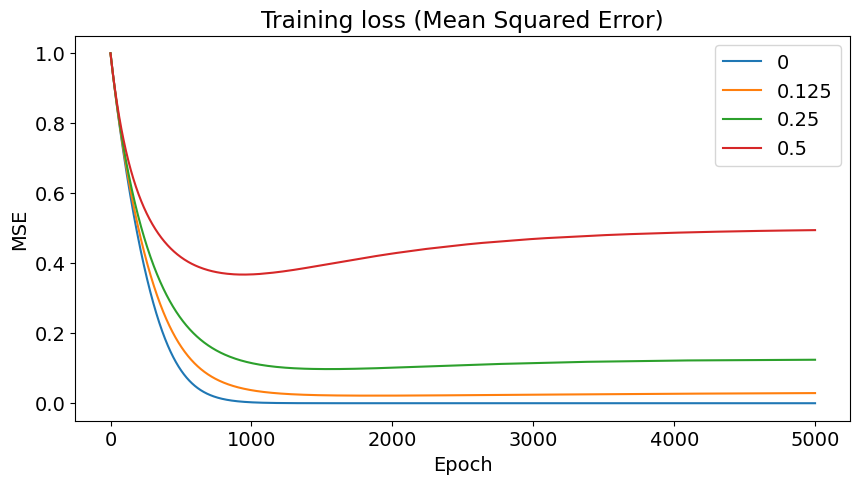

In [135]:
plot_vt(losses, wd_lambdas)

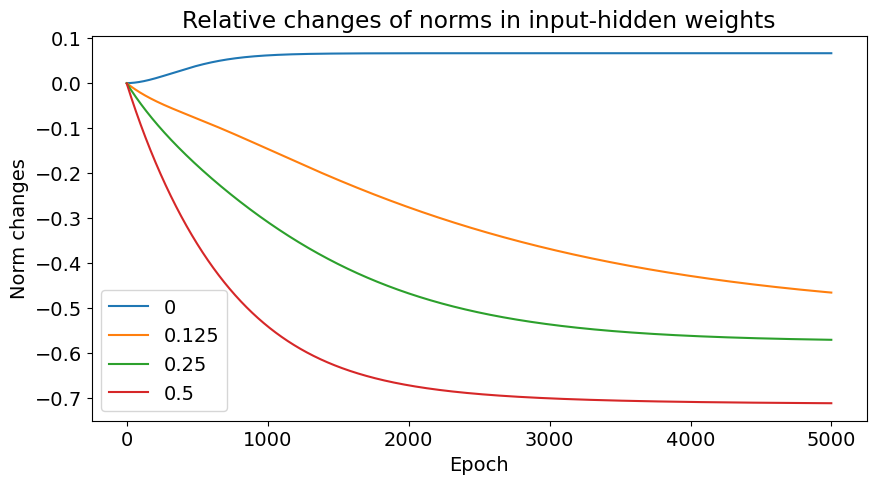

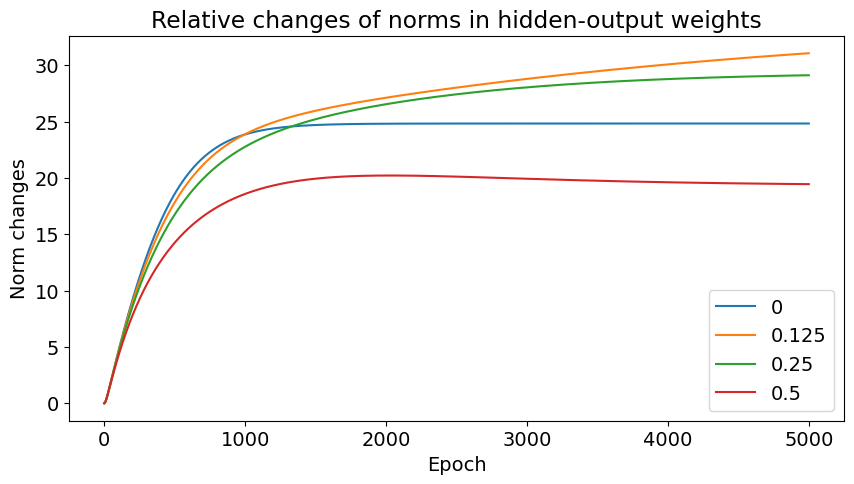

In [136]:
# Plotting relative changes of norms in wieghts
plot_vt(w1_rel_changes, wd_lambdas, y_label="Norm changes", title="Relative changes of norms in input-hidden weights")
plot_vt(w2_rel_changes, wd_lambdas, y_label="Norm changes", title="Relative changes of norms in hidden-output weights")

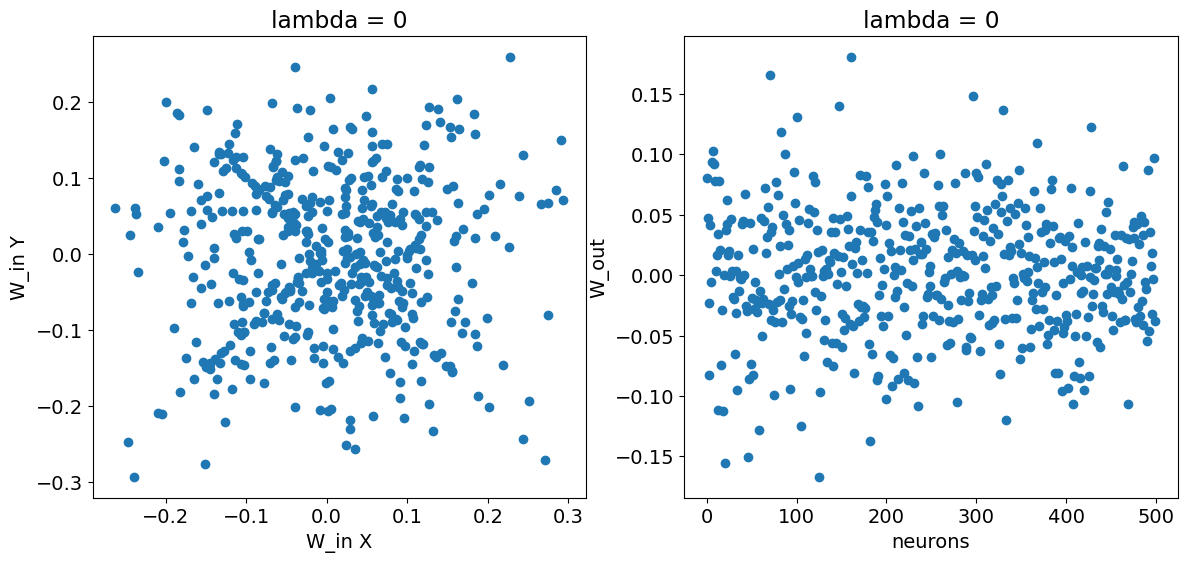

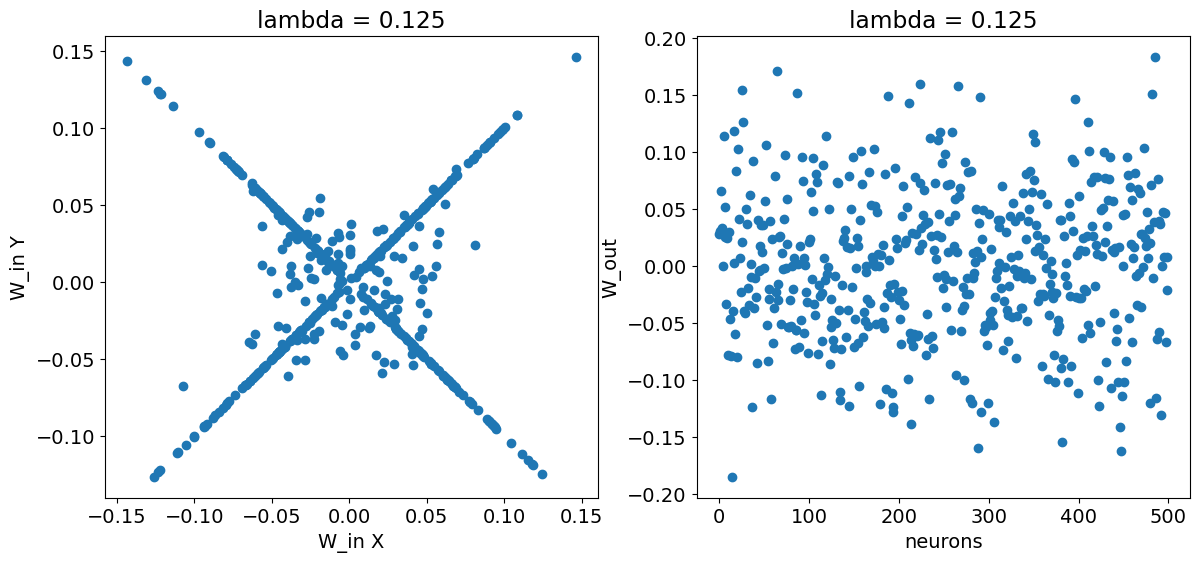

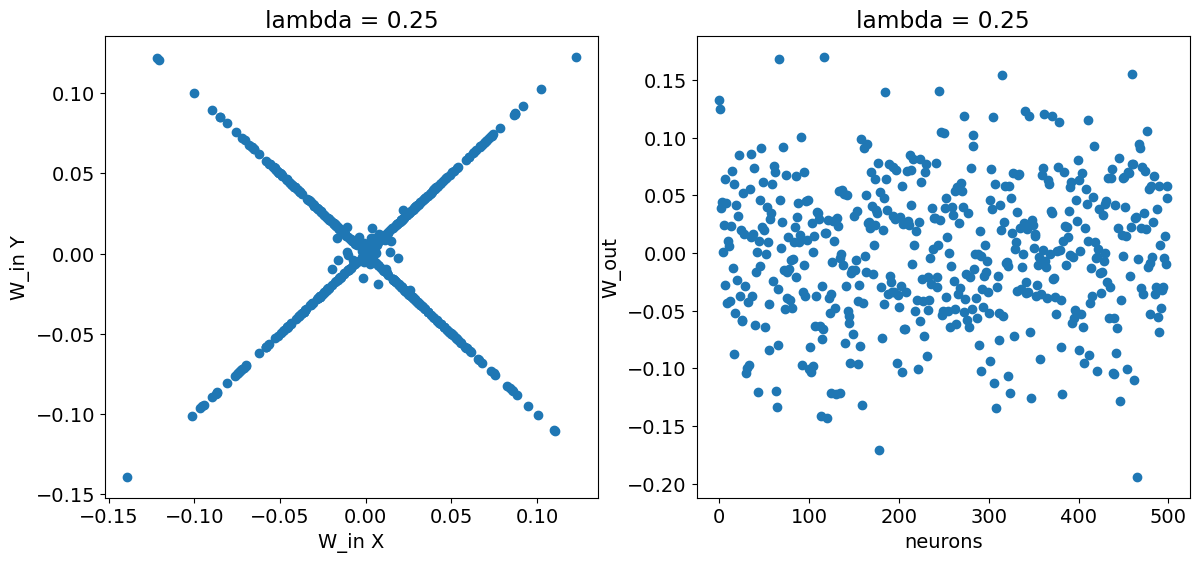

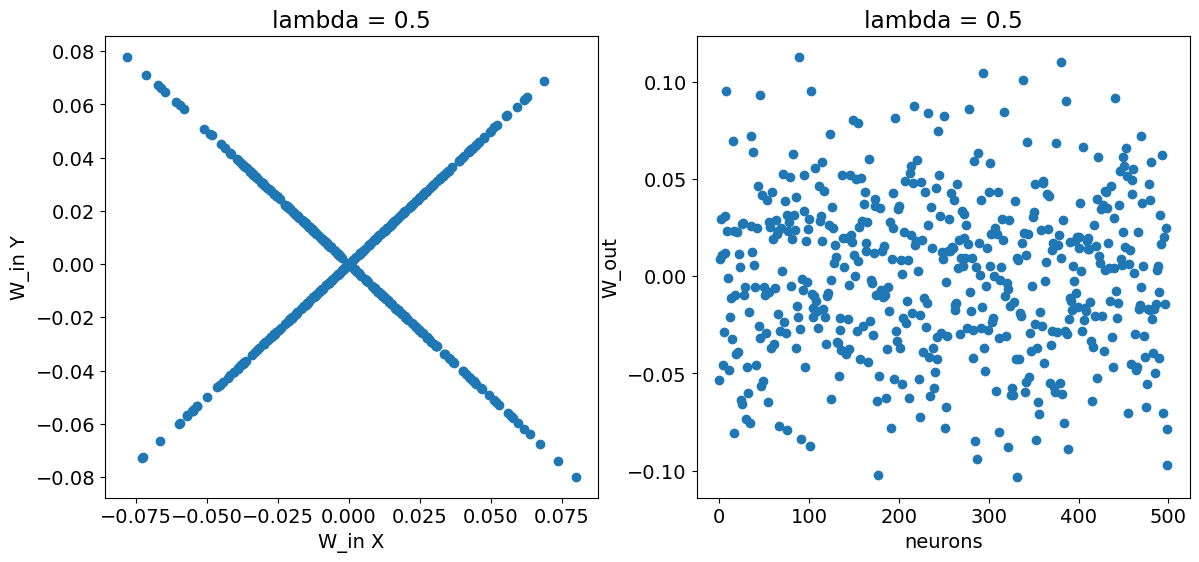

In [137]:
for w_i, weight in enumerate(wd_lambdas):
  # model = rich_lazy_models[a_i]
    model = models[w_i]
    
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(14, 6)

    for p_i, (name, param) in enumerate(model.named_parameters()):
        axis = axes[p_i]
        
        if name == 'in_hid.weight':
            in_hid = param.detach().numpy()
            axis.scatter(in_hid[:, 0], in_hid[:, 1])

            axis.set_xlabel('W_in X')
            axis.set_ylabel('W_in Y')
            # axis.set_xlim(-0.05, 0.05)
            # axis.set_ylim(-0.05, 0.05)

            axis.set_title(f'lambda = {weight}')

        elif name == 'hid_out.weight':
            hid_out = param.detach().numpy()
            axis.scatter(np.arange(hid_out.shape[1]), hid_out[0])

            axis.set_xlabel('neurons')
            axis.set_ylabel('W_out')
            # axis.set_ylim(-0.05, 0.05)

            axis.set_title(f'lambda = {weight}')

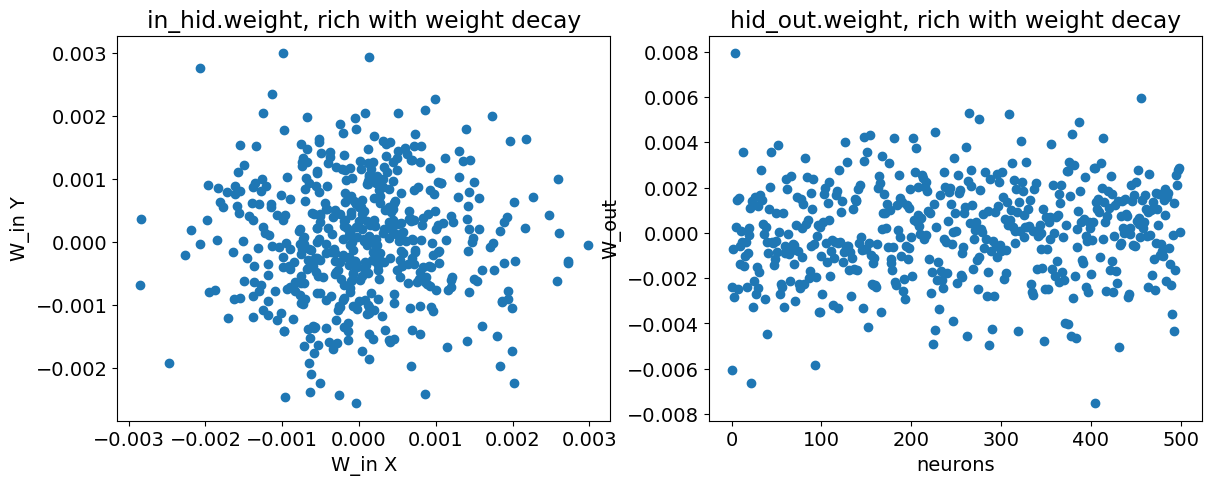

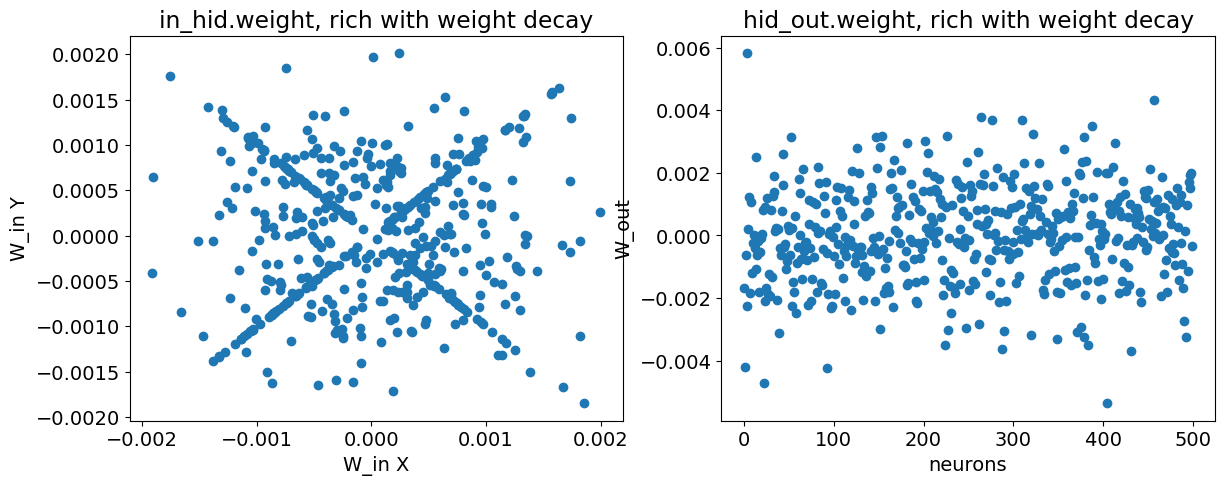

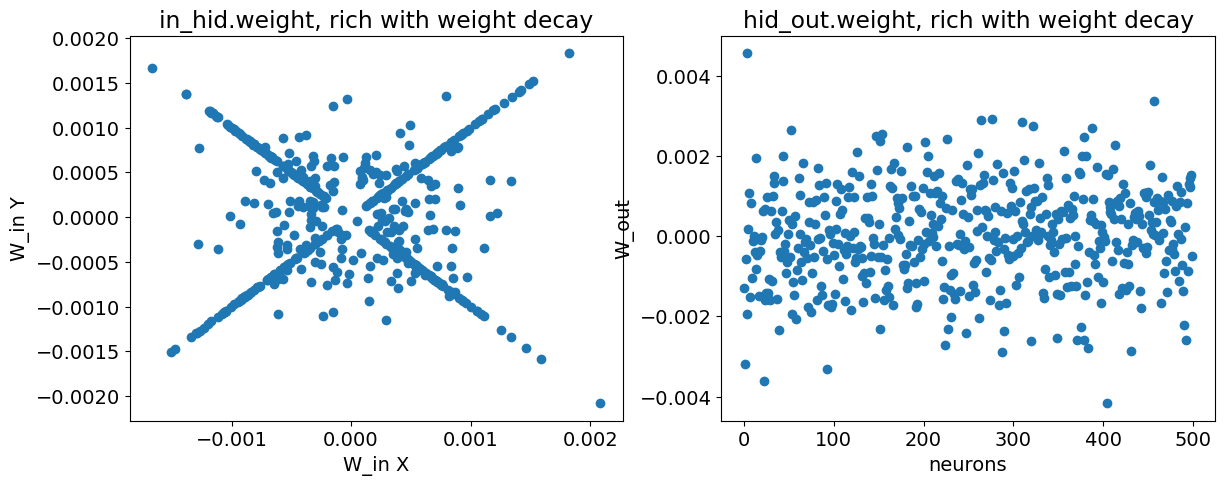

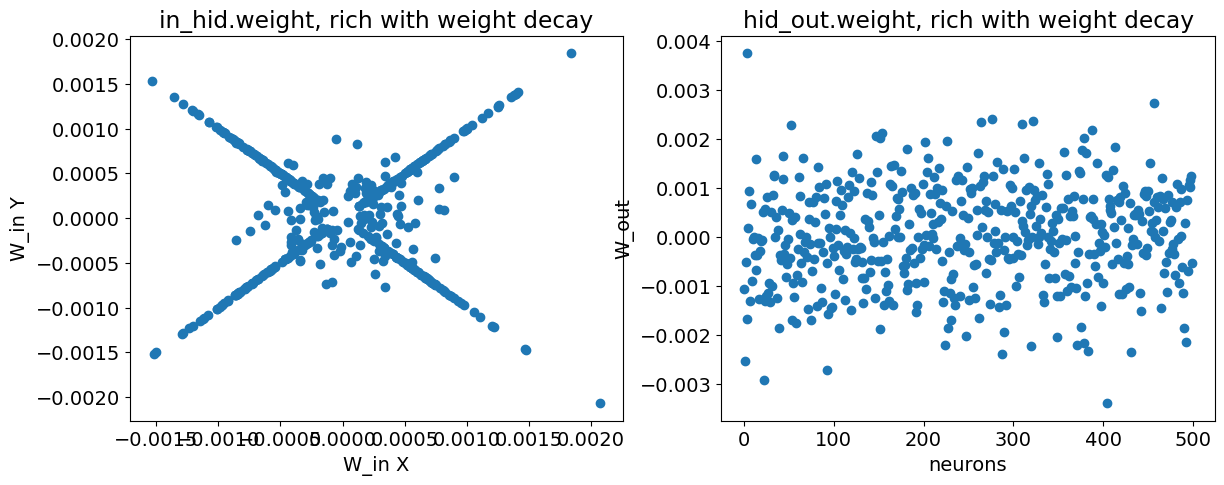

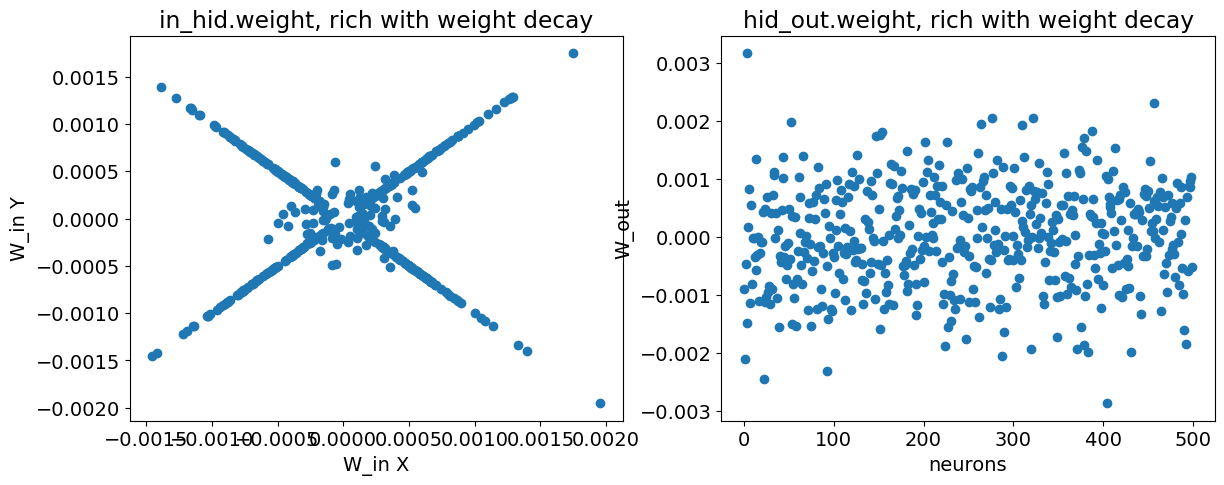

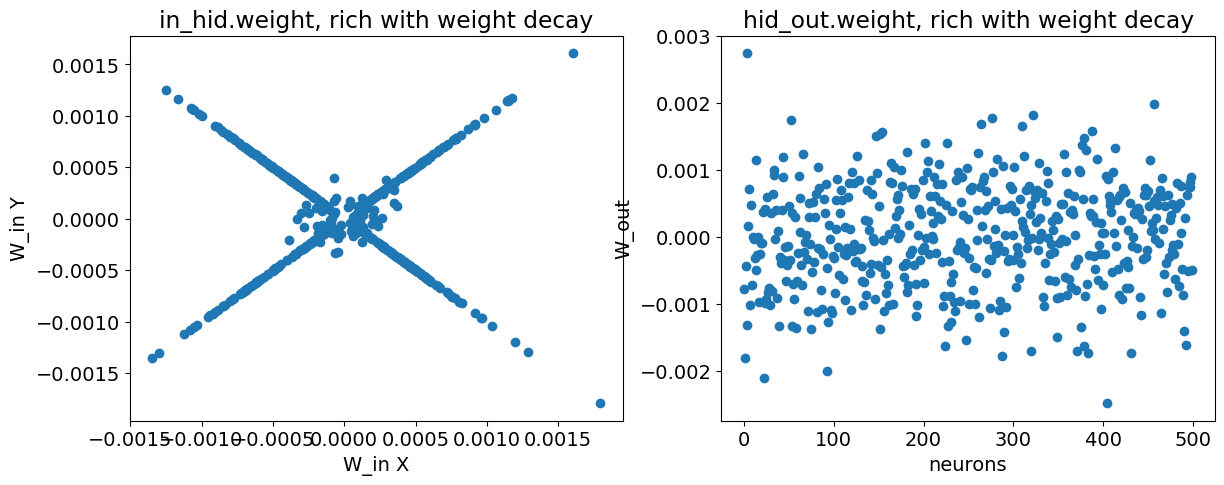

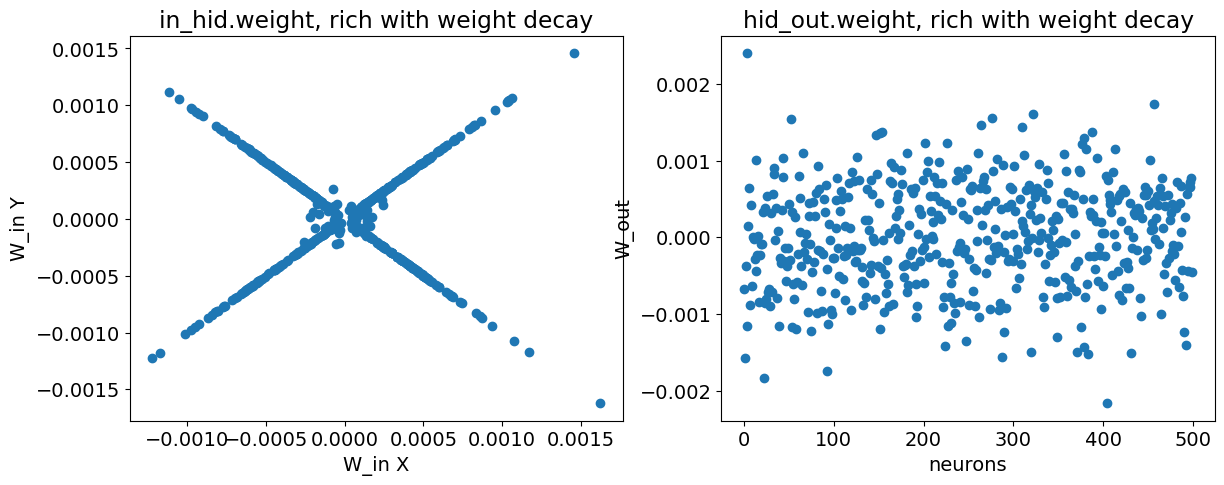

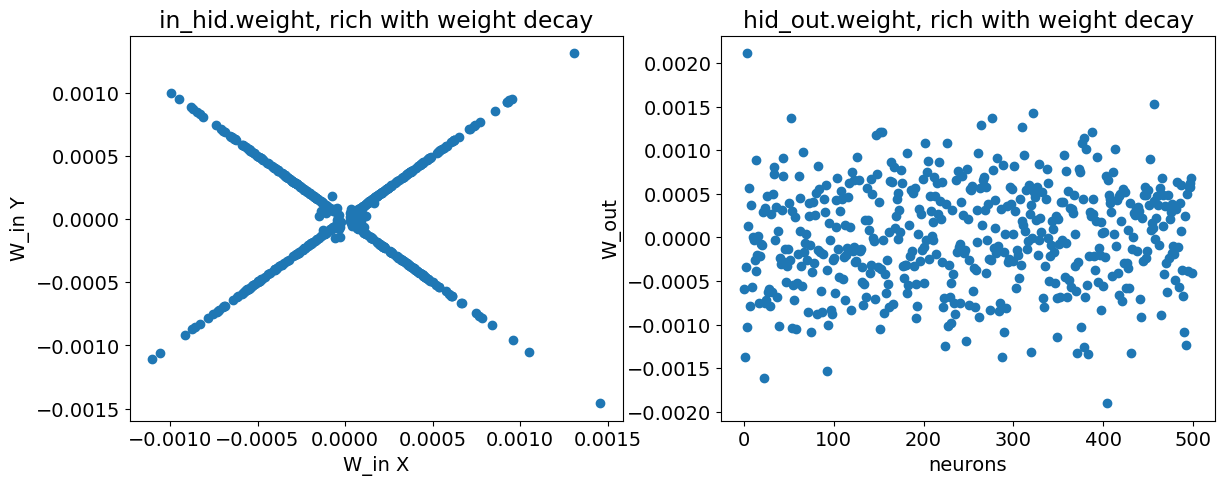

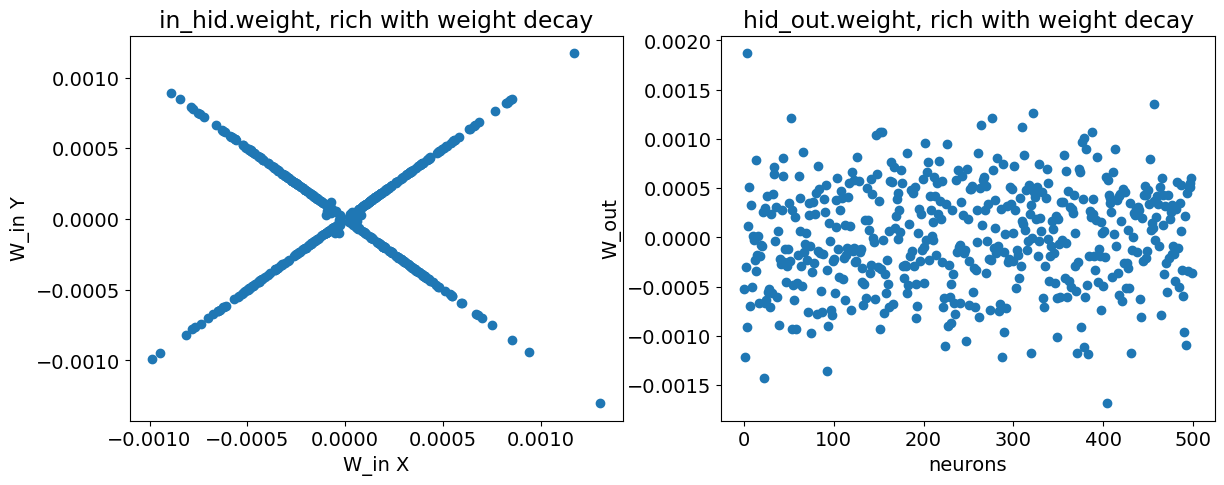

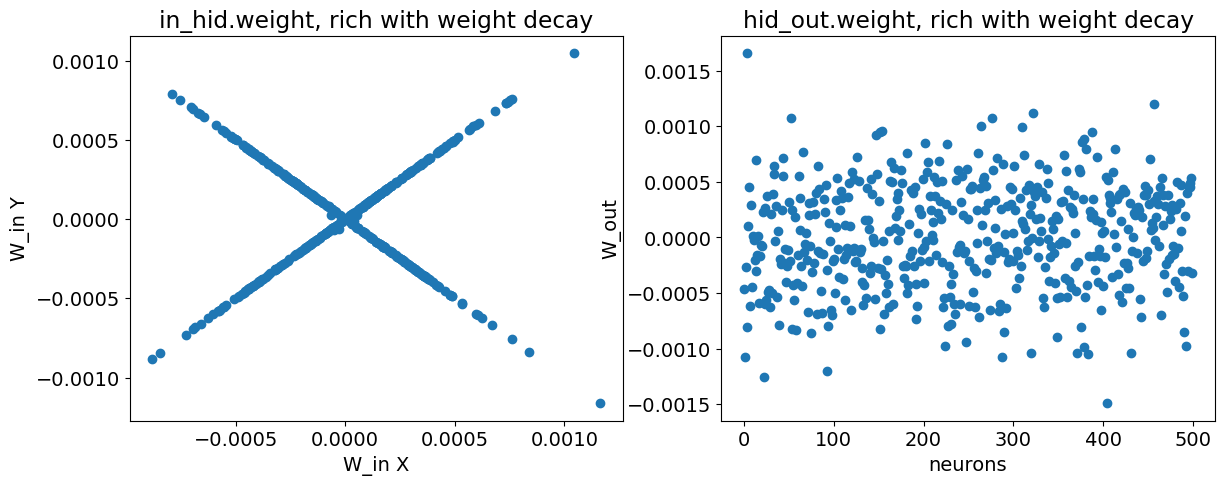

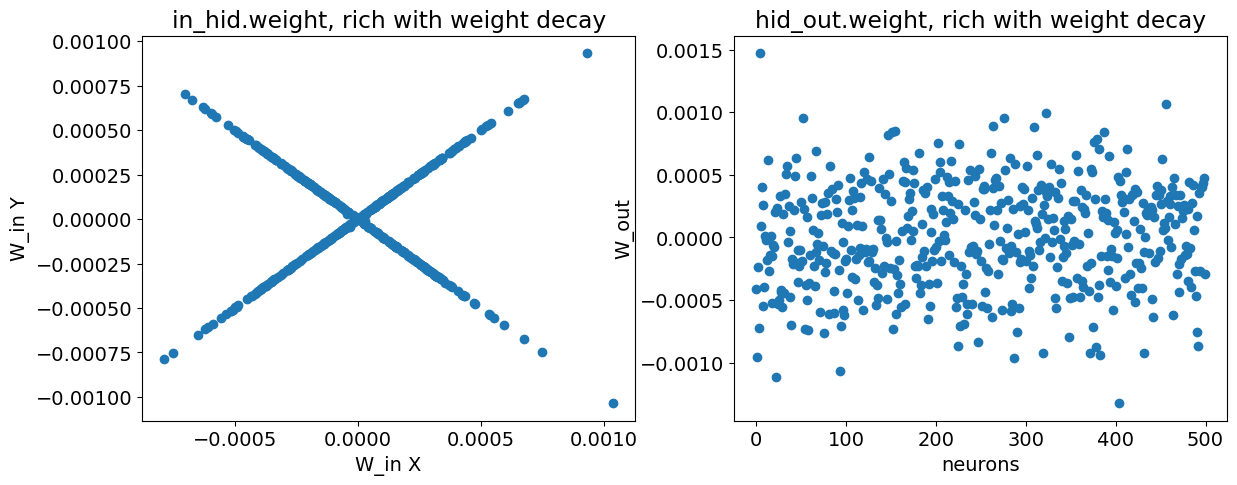

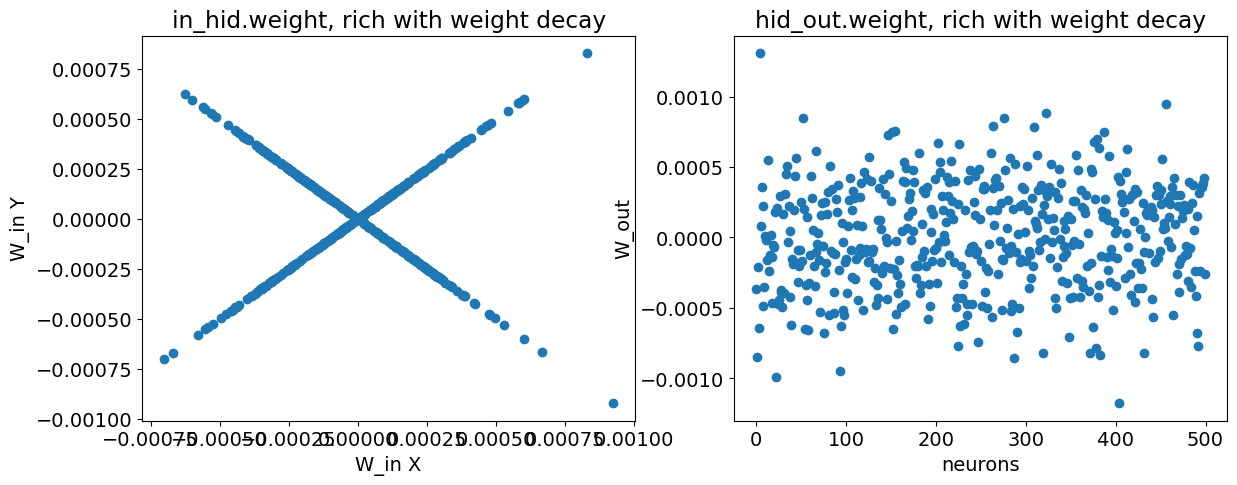

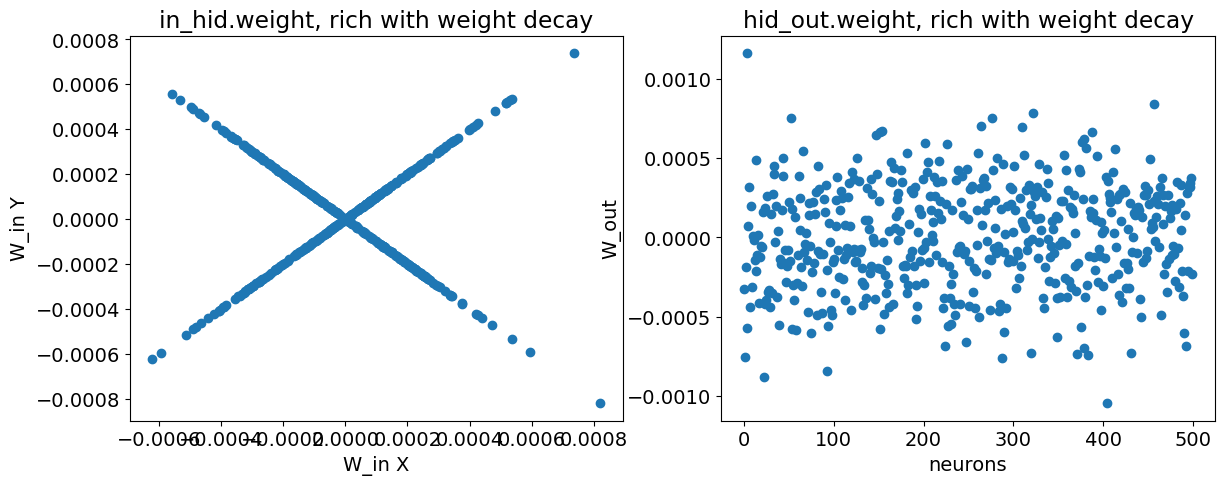

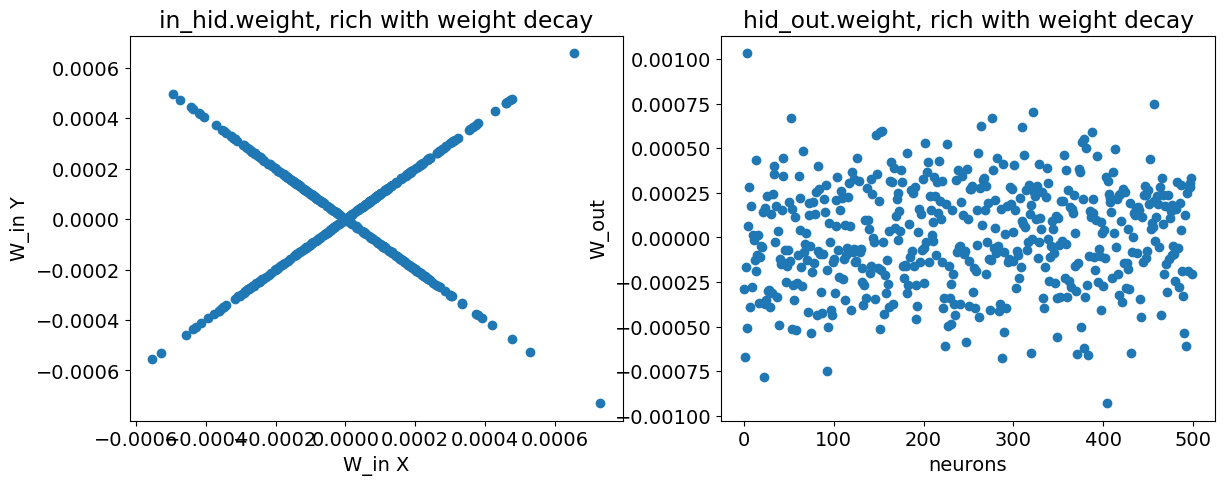

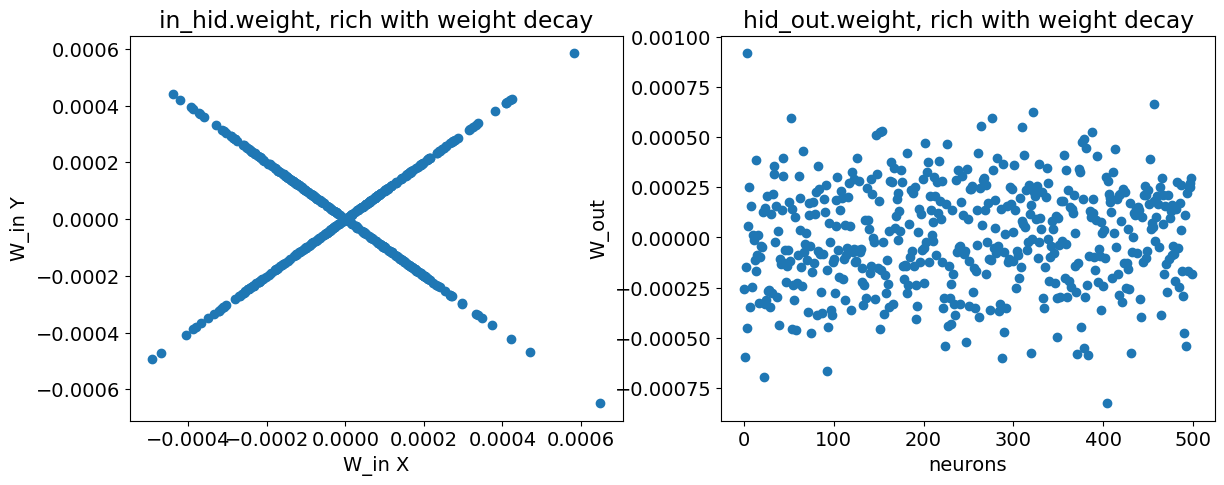

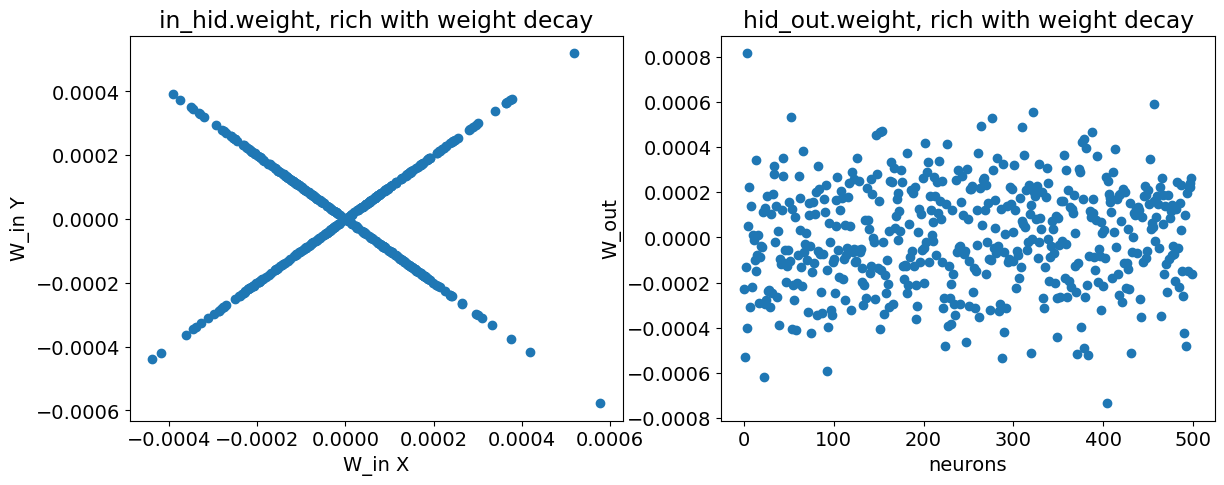

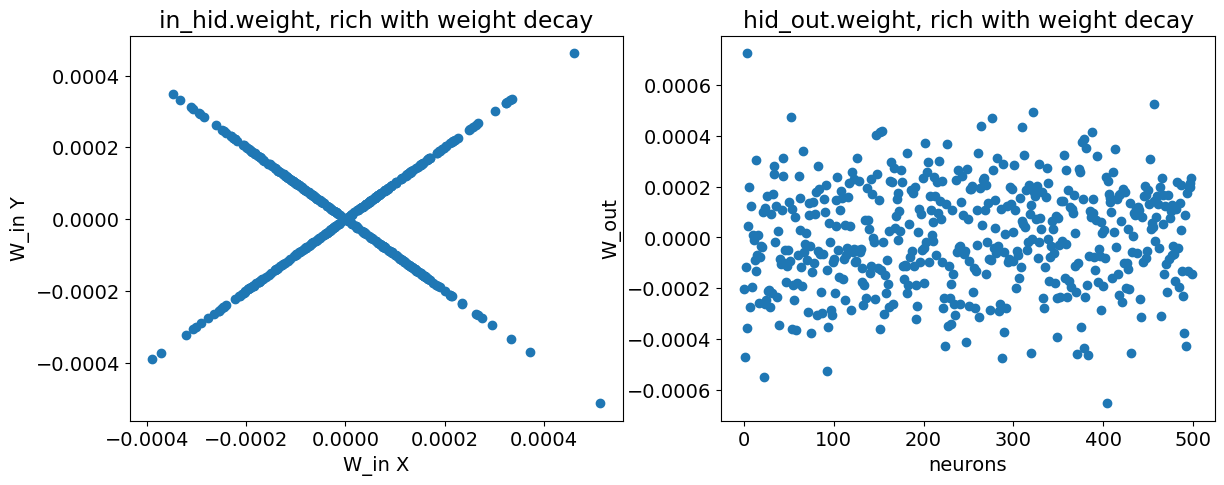

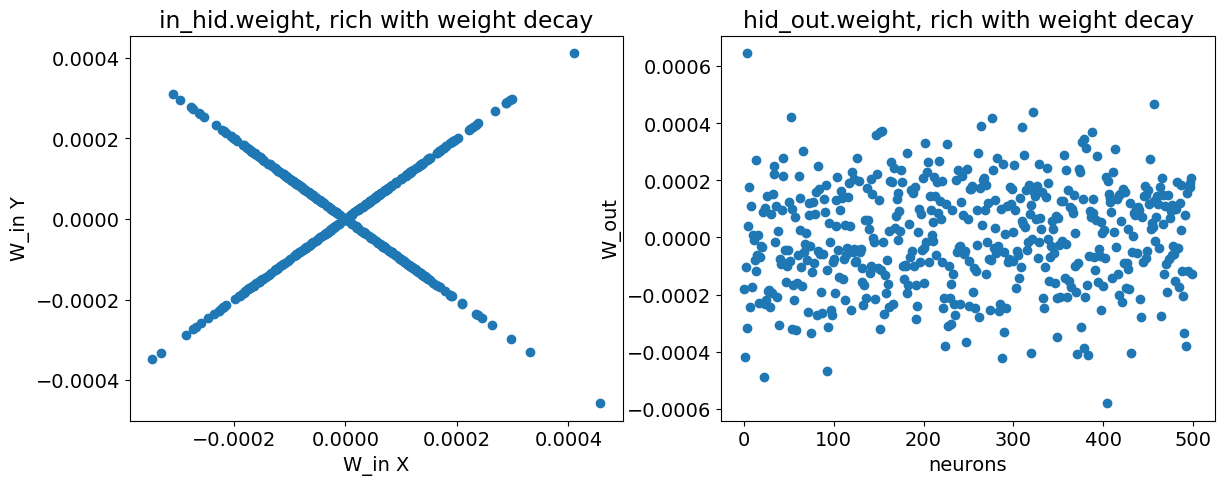

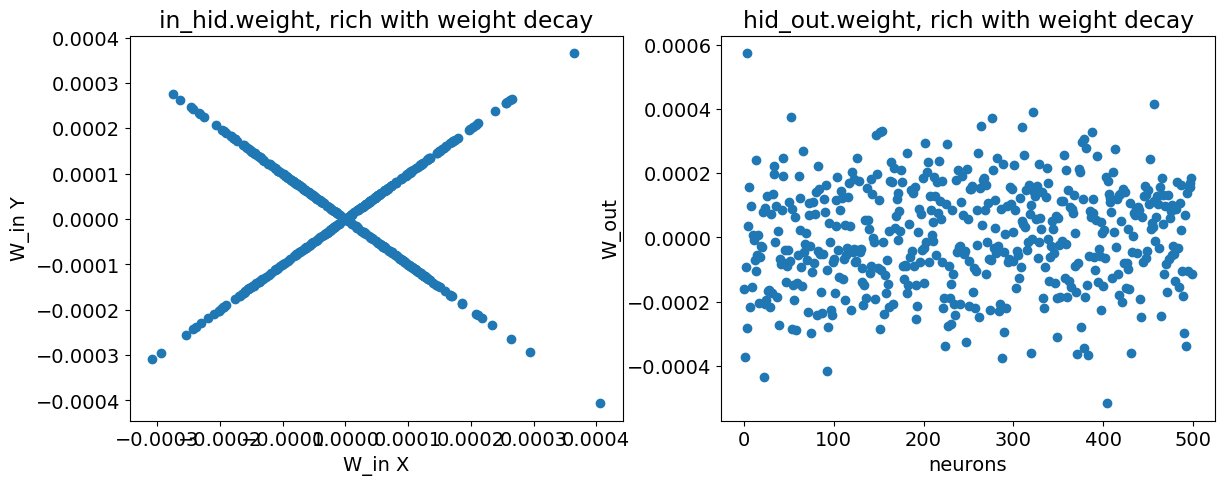

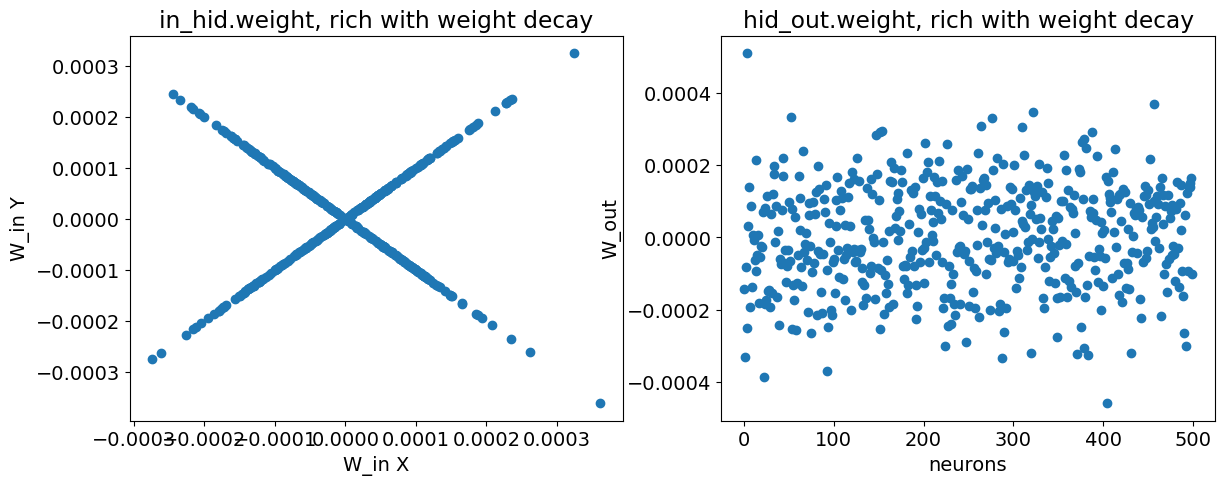

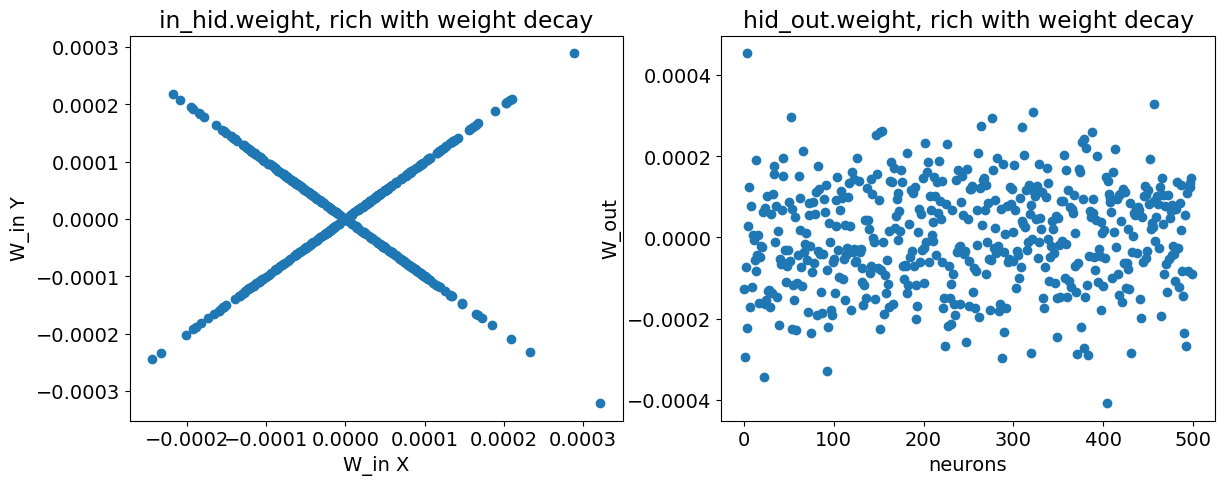

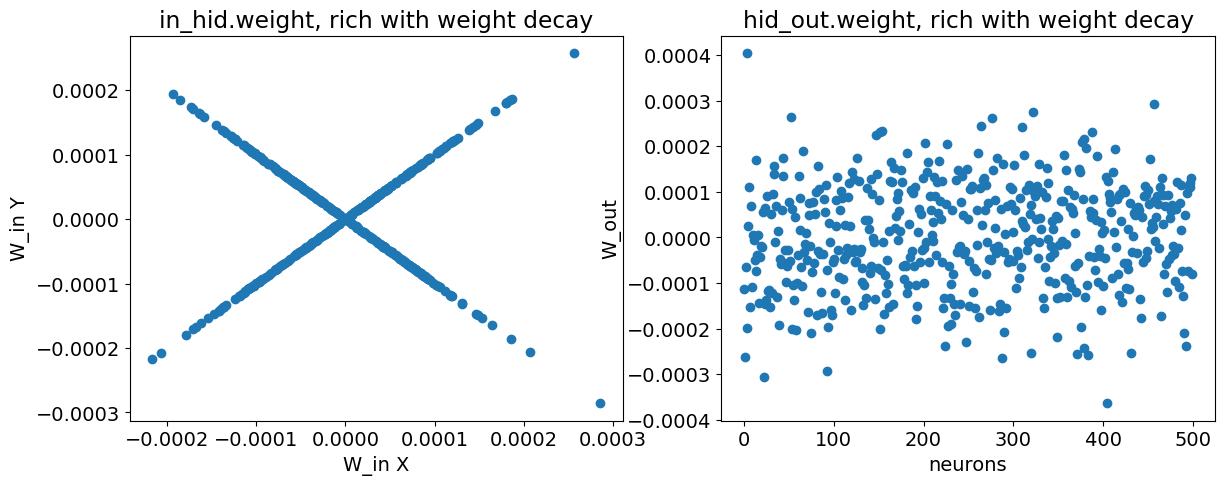

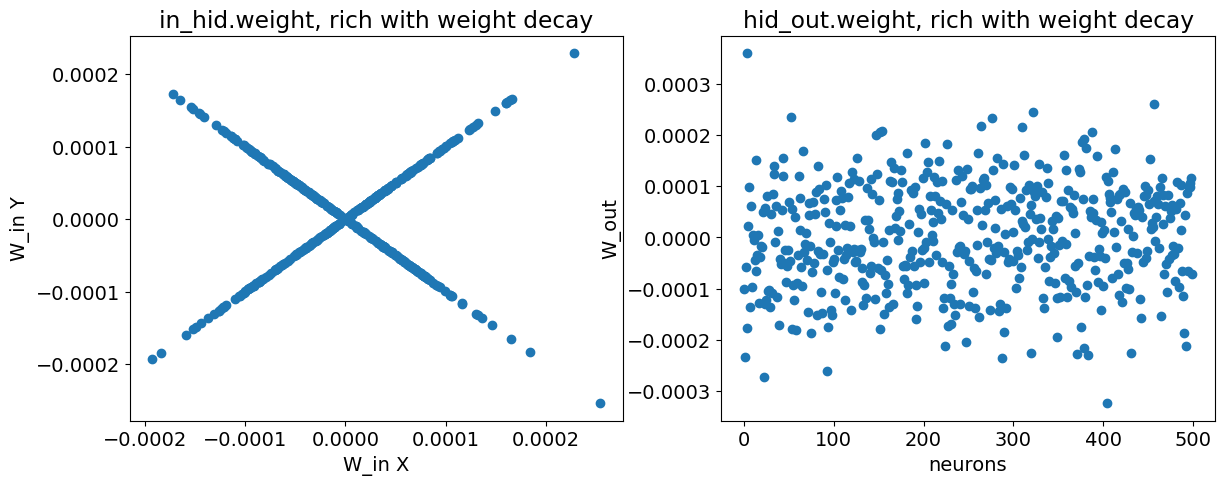

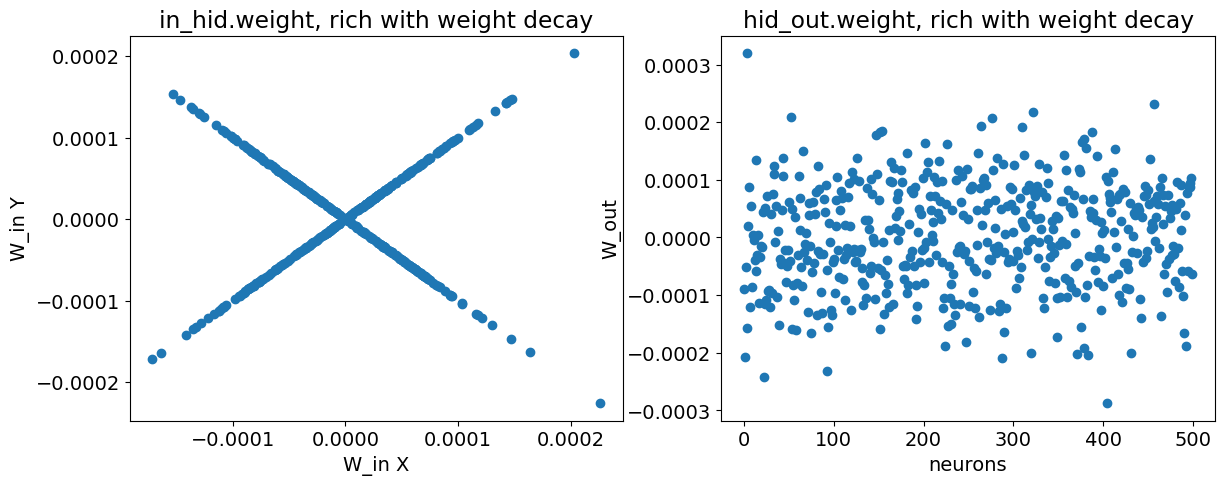

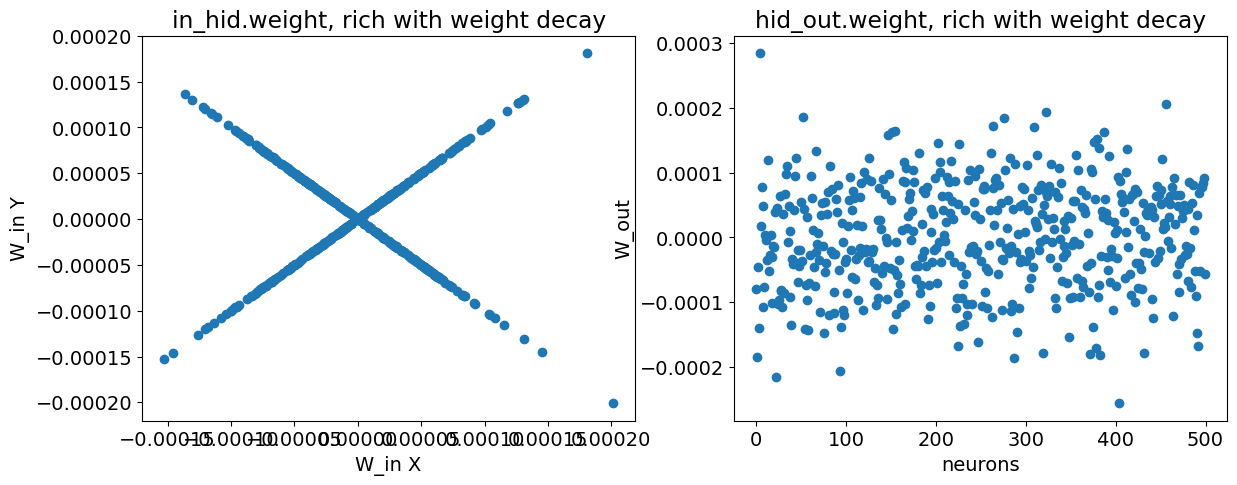

In [120]:
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
w1_init = 0.001
w2_init = 1/dim_hidden

# Weight-decaying parameters
# wd_lambdas = [0, 0.25, 0.5, 1]
wd_lambda = 1

# Training
dlnn_model = LNNet(dim_input, dim_hidden, dim_output, w1_init, w2_init)

optimizer = optim.SGD(dlnn_model.parameters(), lr=lr, weight_decay=wd_lambda)
criterion = nn.MSELoss()

for i in range(n_epochs):
    optimizer.zero_grad()
    y_pred, hiddens = dlnn_model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if i % 200 == 0:
        fig, axes = plt.subplots(1, 2)
        fig.set_size_inches(14, 5)
        for p_i, (name, param) in enumerate(dlnn_model.named_parameters()):
            axis = axes[p_i]
            
            if name == 'in_hid.weight':
                in_hid = param.detach().numpy()
                axis.scatter(in_hid[:, 0], in_hid[:, 1])
                # axis.set_xticks([])
                # axis.set_yticks([])

                axis.set_xlabel('W_in X')
                axis.set_ylabel('W_in Y')
                # axis.set_xlim(-2, 2)
                # axis.set_ylim(-2, 2)
                
                axis.set_title(f'{name}, rich with weight decay')
                
            elif name == 'hid_out.weight':
                hid_out = param.detach().numpy()
                axis.scatter(np.arange(hid_out.shape[1]), hid_out[0])
                
                axis.set_xlabel('neurons')
                axis.set_ylabel('W_out')
                # axis.set_ylim(-0.1, 0.1)
                
                axis.set_title(f'{name}, rich with weight decay')
        
        plt.show()
        # plt.savefig(f'lazy_{i:04d}.png')
        # plt.cla()
        # plt.close()

## Robustnesss vs. Learning speed (stability vs. plasiticity)

In [339]:
x1 = np.array ([-1., -1., 1., 1.], dtype = np.float32)
x2 = np.array ([-1., 1., -1., 1.], dtype = np.float32)
y  = np.array ([-1., 1., 1., -1.],dtype = np.float32)

noisy_X, noisy_y, _, _ = create_dataset(x1, x2, y, n_repeats=5000, noise_lev=5)

In [342]:
criterion = nn.MSELoss()
# w1_inits = [0.001, 0.01, 0.1, 0.5]
model = models[0]

noisy_y_pred = model(noisy_X)[0].detach()

noisy_loss = criterion(noisy_y_pred, noisy_y)
print(noisy_loss)

# noisy_y_pred_class = torch.zeros(noisy_y_pred.shape)
# noisy_y_pred_class[noisy_y_pred > 0] = 1.
# noisy_y_pred_class[noisy_y_pred <= 0] = -1.
# (noisy_y_pred_class == noisy_y).sum() / noisy_y.shape[0]

tensor(10.0452)


Text(0.5, 1.0, 'Noisy inputs')

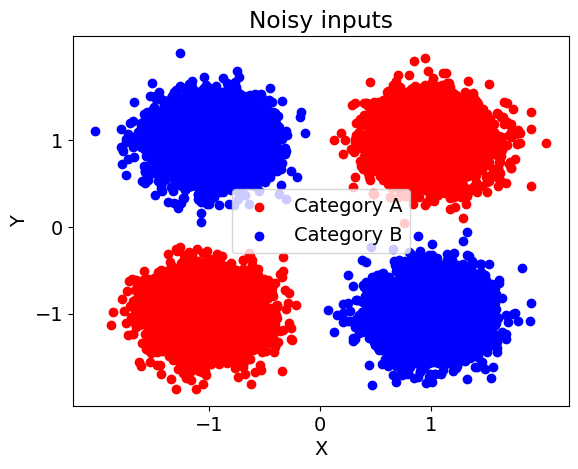

In [328]:
cat_A_idx = (noisy_y_pred_class == -1.)[:, 0]
cat_B_idx = (noisy_y_pred_class == 1.)[:, 0]

plt.scatter(noisy_X[cat_A_idx, 0], noisy_X[cat_A_idx, 1], c = 'r', label = 'Category A')
plt.scatter(noisy_X[cat_B_idx, 0], noisy_X[cat_B_idx, 1], c = 'b', label = 'Category B')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend()
plt.title('Noisy inputs')